# PCA

## Simple explanation

Principal component analysis (PCA) is a technique used to simplify large sets of data by identifying patterns and reducing the number of features or variables in the data. It does this by finding the "principal components", which are the directions in which the data varies the most. These principal components can be used to represent the original data using fewer variables, while still retaining most of the information. In simple terms, PCA is a method for reducing the complexity of a dataset while still preserving as much of its information as possible.

## More detailes explanation

PCA is a dimensionality reduction technique that is commonly used in data analysis and machine learning. It is particularly useful when you have a large number of features or variables in your data, as it can help you identify the most important patterns and reduce the number of variables while still retaining most of the information in the data.

The basic idea behind PCA is to find the directions (called "principal components") in which the data varies the most, and then use these directions to represent the data using a smaller number of variables. These directions are found by performing a linear transformation on the data, which is done by computing the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors corresponding to the largest eigenvalues are chosen as the principal components.

Once the principal components are found, the data can be projected onto these new directions, which results in a new set of variables that are linear combinations of the original variables. These new variables, called the principal component scores, can be used to represent the original data with fewer variables.

One of the most important features of PCA is that it finds directions that are not correlated with each other, meaning that the information in one direction is independent of the information in another direction. This makes it a good tool for data visualization, as it allows you to project high-dimensional data onto a 2D or 3D space.

PCA can be used in various applications such as image compression, feature extraction, and denoising, anomaly detection, and more.






* Variance

How much variation or spread the data has

$$ Var(X) = \frac{1}{n} \sum(X_{i} - \bar{X})^{2} $$

* Covariance Matrix

Indicates the level to which two variables vary together

$$ Cov(X, Y) = \frac{1}{n} \sum(X_{i} - \bar{X})(Y_{i} - \bar{Y})^{T} $$
$$ Cov(X, X) = \frac{1}{n} \sum(X_{i} - \bar{X})(X_{i} - \bar{X})^{T} $$

* Eigenvector, Eigenvalues

The eigenvectors point in the direction of the maximum variance, and the corresponding eigenvalues indicates the importance of its corresponding eigen vector.

$$ A\vec{v} = λ\vec{v} $$

In [1]:
import numpy as np

## Clean version with numpy

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


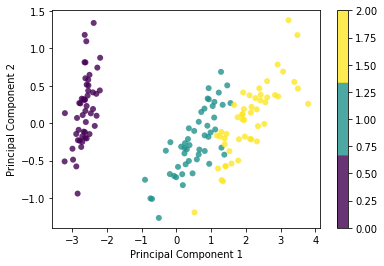

In [20]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    # data = datasets.load_digits()
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # Project the data onto the 2 primary principal components
    pca = PCA(2)
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()

## sklearn

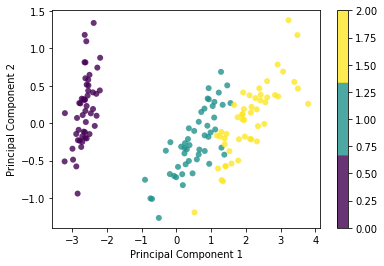

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

pca = PCA(n_components=2)
pca.fit(X)

new_x = pca.fit_transform(X)

plt.scatter(
    new_x[:, 0], new_x[:, 1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()